# Statistics with Python Implementation
____

## Contents:
- [Statistics Summary](#Statistics-Summary)
  - Types of Statistics
  - Population and Sample
  - Types of Variables
  - 4 levels of Variable Measurement
  - Plots
- [Measure of Central Tendency](#Measure-of-Central-Tendency)
	- Mean
	- Median
	- Mode
- [Measures of Variability](#Measures-of-Variability)
	- Dispersion
	- Range
	- Variance
	- Standard deviation

- [Distribution Quantiles](#Distribution-Quantiles)
	- Percentiles
	- Quantiles and Quartiles
	- Interquartile range
	- Outliers

- [Normal Distribution](#Normal-Distribution)
	- Probabilistic rule for Gaussian distribution
	- How to check if distribution is normal
	- z-score and z-table
	- Standardisation and Normalization

- [Hypothesis Testing](#Hypothesis-Testing)
	- Null Hypothesis and Alternative Hypothesis
	- Types of errors
	- p-value

- [Central Limit Theorem](#Central-Limit-Theorem)
	- point estimate
	- standard mean error
- [Z-Test](#Z-Test)
	- one-sample z-test
	- two-sample z-test
	- Confidence intervals

- [Comparing Means](#Comparing-Means)
 	- [T-Test](#T-Test)
		- Student’s distribution
		- One-sample t-test
		- Two-sample t-test

    - [ANOVA](#ANOVA)
	    - One-way ANOVA
	    - Sums of squares
		    - ss total
		    - ss within-group
		    - ss between-group
	    - Between-group variability
	    - Within-group variability
        - Fisher’s F-test
        - Bonferroni correction
        - Tukey HSD

    - [Two-Way ANOVA](#Two-Way-ANOVA)

- [Correlation](#Correlation)
	- Correlation
	- Covariance
 	- Pearson correlation
	- Spearman Correlation

- [Simple Linear Regression](#Simple-Linear-Regression)
	- One-way regression analysis
	- Regression line
	- Least square method
	- Coefficient of determination
	- Conditions to use linear regression

- [Multiple Linear Regression](#Multiple-Linear-Regression)
	- Adjusted R-squared
	- Conditions for multiple linear regression

- [Categorical Data Analysis](#Categorical-Data-Analysis)
    - Probability mass function
    - Bernoulli’s distribution
    - Binomial distribution
    - [Chi-Square Test](#Chi-Square-Test)

    - [Contingency Tables Analysis](#Contingency-Tables-Analysis)
        - Expected values
        - Observed values
        - Chi-Square for contingency table
        - Yates correction
        - Fisher’s exact test

    - [Logistic Regression](#Logistic-Regression)
        - odds and log odds
        - Intercept only model
        - Model with one categorical predictor
        - Model with two categorical predictors
        - Mixed regression model

- [Nonparametric Methods](#Nonparametric-Methods)
    - Wilcoxon signed-rank W-test
	- Mann–Whitney U-test
	- Kruskal–Wallis H-test

- [Bonus!!!](#Bonus!!!)
	- K-Means Clustering

- [Roadmap of Choosing Statistical Methods](#Roadmap-of-Choosing-Statistical-Methods)


In [70]:
import numpy as np
import math
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [71]:
sns.set(rc={"figure.figsize":(3, 2)})
%matplotlib inline

## Statistics Summary

__What is Statistics__ - is a science of collecting, organizing and analyzing data

__Why need Statistics?__ - to know the data and for better decision-making

__What is Data?__ - facts or pieces of information that can be measured

__Types of Statistics?__
   - __Descriptive__ - consists of organizing and summarizing data
   - __Inferential__ - technique wherein we used the data that we have measured to form conclusions

__Population ($N$)__ - is a set of similar items or events which is of interest for some question or experiment

__Sample ($n$)__ - a subset of the population that is chosen to represent the population in a statistical analysis

__Sampling Techniques__:
  - __Simple Random Sample__ - events or items are randomly chosen (each has an equal chance to be picked up)
  - __Stratified Sample__ - the population is split into non-overlapping groups (stratum), then sampling is done on elements within each stratum (Male & Female)
  - __Systematic Sampling__ - we choose every $n^{th}$ sample from the population
  - __Cluster Sample__ - the population is divided into mutually homogeneous yet internally heterogeneous groups (clusters) and then selected clusters are sampled


__Variables__ - a property that can take on any value:
   - Numerical (quantitative) - measurable numerically, math functions can be applied:
      - Continuous 0, 2, 4.5, 10, 22, 57.1 - _age, weight, height, etc_
      - Discrete 1, 2, 3, 4 - _how many children I have_
   - Categorical (Qualitative) - categories based on some characteristics (_color, gender, type, etc_)

4 Levels of Variable Measurement:
 - Nominal data - values with no numerical meaning - categories, classes, etc (_gender, color_)
 - Ordinal data - values are numbers but __ordering__ is the only meaning of the numbers (_school marks_)
 - Interval data - numerical data where the intervals between numbers are comparable (no absolute zero and no ratio, like in _time intervals_)
 - Ratio data - all the characteristics of interval data plus there's an "absolute zero" and ration between values matters (_height_)

__Frequency__ - how often an item or event occur

__Bar plot__ - graph to show the frequency of discrete variables

<AxesSubplot: >

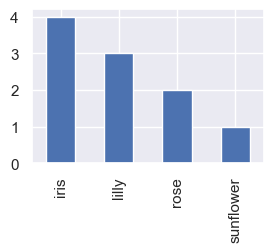

In [72]:
flowers = pd.Series(['lilly', 'rose', 'rose', 'sunflower', 'lilly', 'iris', 'iris', 'lilly', 'iris', 'iris'])
flowers.value_counts().plot(kind='bar', figsize=(3, 2))

__Histogram__ - graph to show the frequency of continuous variables

<AxesSubplot: ylabel='Frequency'>

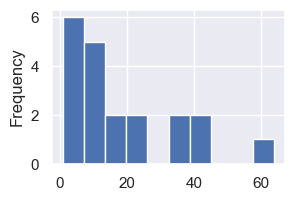

In [73]:
numbers = pd.Series([1, 4, 12, 34, 6, 13, 43, 1, 12, 6, 64, 34, 6, 18, 12, 13, 14, 22, 24, 42])
numbers.plot(kind='hist', figsize=(3, 2))

<AxesSubplot: ylabel='Count'>

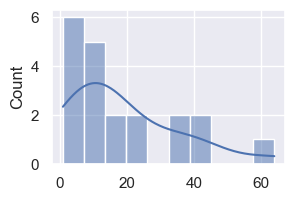

In [74]:
sns.histplot(numbers, kde=True, bins=10)

## Measure of Central Tendency

__Central Tendency__ - refers to the measure used to determine the center of the distribution of data:
 - Median - a value which is in the middle of the __sorted__ values (if number of values is even, then the mean of two middle values)
 - Mode - most frequently occurred value
 - Mean - arithmetic average - sum of all values divided by its count:
    - for Population ($N$): $\mu = \sum_{i=1}^{N}\frac{x_i}{N}$
    - for sample ($n$): $\bar{x}=\sum_{i=1}^{n}\frac{x_i}{n}$

__Properties of Mean__:
 - $M_{x+C} = M_x + C$
 - $M_{x*C} = M_x*C$
 - $\sum(x_i-M_x)=0$

In [75]:
points = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9, 1, 2]
# calculate mode from scratch
def get_mode(data):
    count_values = {}
    max_count = 1

    for d in data:
        count_values[d] = count_values.get(d, 0) + 1
        if count_values[d] > max_count:
            max_count = count_values[d]
            mode = d
    return mode

# find the mode using statistics library
mode_stats = statistics.mode(points)

print(f'Mode = {get_mode(points)} = {mode_stats}')

Mode = 1 = 1


In [76]:
# calculate median from scratch
def calc_median(data):
    array = sorted(data)
    average = len(array)//2
    if len(array)%2 == 0:
        median = (array[average-1] + array[average])/2
    else:
        median = array[average]
    return median

#get median from statistics library
median_stats = statistics.median(points)

print(f'Median = {calc_median(points)} = {median_stats}')

Median = 4.0 = 4.0


In [77]:
# calculate mean from scratch
mean = sum(points)/len(points)

# get mean from statistics library
mean_stats = statistics.mean(points)

print(f'Mean = {mean} = {mean_stats}')

Mean = 4.416666666666667 = 4.416666666666667


## Measures of Variability

__Measures of Variability__:
 - Dispersion - spread of the values in data
  - Range - simple measure of _Dispersion_ - difference between min and max
 - Variance - the expectation of the squared deviation of a random variable from its population mean or sample mean - is a measure of _Dispersion_ meaning it is a measure of how far a set of numbers is spread out from their average value:
    - Population Variance: $\sigma^2=\sum_{i=1}^{N}\frac{(x_i-\mu)^2}{N}$
    - Sample Variance: $s^2=\sum_{i=1}^{n}\frac{(x_i-\bar{x})^2}{n-1}$
 - Standard Deviation - a measure of the amount of variation or dispersion of a set of values and is a square root of Variance:
    - Population Standard Deviation:  $\sigma=\sqrt{\sigma^2}$
    - Sample Standard Deviation:  $s = \sqrt{s^2}$

__Properties Standard Deviation__:
   - $s_{x+C}=s_x$
   - $s_{xC}=s_x\cdot C$

In [78]:
# calculate range
range_data = max(points) - min(points)
range_data

8

In [79]:
# calculate population variance from scratch
def calc_variance(data):
    deviation_sum = 0
    for x_i in data:
        deviation_sum += (x_i-mean)**2
    variance = deviation_sum/(len(data)-1)
    return variance

# get population variance from statistics library
variance_stats = statistics.variance(points)

print(f'Variance = {calc_variance(points)} = {variance_stats}')

Variance = 10.083333333333334 = 10.083333333333334


In [80]:
# calculate standard deviation from scratch
sd = variance_stats**(1/2)

# get standard deviation from statistics library
sd_stats = statistics.stdev(points)

print(f'Standard deviation = {sd} = {sd_stats}')

Standard deviation = 3.1754264805429417 = 3.1754264805429417


## Distribution Quantiles

__Percentile Score__ - a k-th percentile - is a score below which a given percentage k of scores in its frequency distribution falls (exclusive definition) or a score at or below which a given percentage falls (inclusive definition):
  - $P_x = \frac{number\_of\_values\_below\_x}{n}\cdot100$

__Example__:

_distribution = 2, 2, 3, 4, 5, 5, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 10, 11, 11, 12_
_1. What is the Percentile ranking of '10'?_

_x=10_
_n=20_
_number of values before '10' - 16_
$P_x=P_{10}=\frac{16}{20}\cdot100=80\%$

_2. What value exists at the Percentile of 25%?_
_Value = (Percentile/100) x (n + 1)_

__Quantiles__: cut points dividing the range of a distribution into continuous intervals with equal probabilities.

__Quartiles__: 3 points that divide the distribution into 4 parts:
 - 1st quartile (Q1) - 25% Percentile of the sorted distribution
 - 2nd quartile (Q2) = Median
 - 3rd quartile (Q3) - 75% Percentile of the sorted distribution

__Interquartile range__ - another measure of _Dispersion_: IQR = Q3 - Q1

__Q-Q plot__ - a probability quantile – quantile plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line y = x

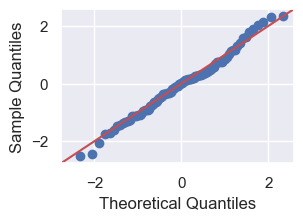

In [81]:
import statsmodels.api as sm
data_points = np.random.normal(0, 1, 100)
fig = sm.qqplot(data_points, line ='45')
plt.show()

__Outliers__ - values that are lying below (Q1 - 1.5 x IQR) and above (Q3 + 1.5 x IQR)

__Box Plot__ - a graph that shows _median_, _quartiles_, _min_ and _max_ values and the _outliers_

<AxesSubplot: >

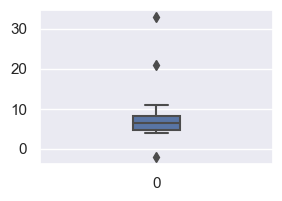

In [82]:
a = pd.Series([-2, 5, 7, 4, 8, 4, 6, 9, 8, 6, 4, 6, 8, 11, 21, 33])
sns.boxplot(a, width=.2)

## Normal Distribution

__Distributions__ - showing how the values in the data are distributed

__Normal (Gaussian) Distribution__ - symmetric, uni-modal and deviations from the mean follow the probabilistic law ($3\sigma$):
   - 65% of observations lie within 1 standard deviations from the mean
   - 95% of observations lie within 2 standard deviations from the mean
   - 99,7% of observations lie within 3 standard deviations from the mean
$$P(\bar{x}-\sigma < X < \bar{x}+\sigma) = 0.68$$
$$P(\bar{x}-2\sigma < X < \bar{x}+2\sigma) = 0.95$$
$$P(\bar{x}-3\sigma < X < \bar{x}+3\sigma) = 0.997$$


__How to check that the distribution is normal?__:
 1) Q-Q plot - if close to $45\degree$ line then normal
 2) Shapiro–Wilk test - tests the null hypothesis that a sample came from a normally distributed population

In [83]:
stats.shapiro(data_points) # if p-value >= 0.05, then normal

ShapiroResult(statistic=0.9896007776260376, pvalue=0.6323887705802917)

__z-score__ - shows how much the value is away from the mean in terms of the standard deviation:
$$z_i=\frac{x_i-\mu}{\sigma}$$


__Standardization__ - transforming distribution by applying z-score to every value in this distribution

__Standard Normal Distribution__ - transformed dataset where mean is $\mu_z=0$ and standard deviation is $\sigma_z=1$, which we get after standardization

__Normalization__ - a process to transform all the values in the distribution to be in between 0 and 1 _(MinMax Scaler)_

__z-table__ - a table that helps to find an area under the bell curve (%) with respect to a given z-score

__scipy.stats.norm.cdf()__ - Cumulative distribution function for normal distribution. Finds how many % of the sample are located before/less than the given value

In [84]:
print(f'On the interval [-inf; 0.8sd] {stats.norm.cdf(0.8):.2%} of the values are located')

On the interval [-inf; 0.8sd] 78.81% of the values are located


__scipy.stats.norm.sf()__ - Cumulative distribution function for normal distribution. Finds how many % of the sample are located after/larger than the given value

In [85]:
print(f'On the interval [0.8sd; +inf] {stats.norm.sf(0.8):.2%} of the values are located')

On the interval [0.8sd; +inf] 21.19% of the values are located


__scipy.stats.norm.cdf(z2) - scipy.stats.norm.cdf(z1)__ - Finds how many % of the sample are located inside the given interval

In [86]:
print(f'On the interval [-2sd; 0.8sd] {stats.norm.cdf(0.8)-stats.norm.cdf(-2):.2%} of the values are located')

On the interval [-2sd; 0.8sd] 76.54% of the values are located


__scipy.stats.norm.cdf(z1) + scipy.stats.norm.sf(z2)__ - Finds how many % of the sample are located outside the given interval

In [87]:
print(f'On the interval [-inf; -2sd] and [0.8sd; +inf] {stats.norm.cdf(-2)+stats.norm.sf(0.8):.2%} of the values are located')

On the interval [-inf; -2sd] and [0.8sd; +inf] 23.46% of the values are located


#### _Example:_
 - Problem:
  - we are given a distribution: [1, 2, 3, 4, 5, 6, 7]
  - what percentage of values falls above 4.25?
 - Solution:
  - calculate the mean, sd: $\mu=4$, $\sigma = 1$
  - calculate the z-score of 4.25: $z_i=\frac{x_i - \mu}{\sigma} = \frac{4.25-4}{1} = 0.25$
  - check the z-table or see below how to find it with python

In [88]:
# function that takes standard deviation as input and returns the percentage of the values from distribution that lie AFTER this sd
stats.norm.sf(0.25)

0.4012936743170763

In [89]:
# function that takes standard deviation as input and returns the percentage of the values from distribution that lie BEFORE this sd
stats.norm.cdf(0.25)

0.5987063256829237

#### _Example:_
 - find the outliers from the given dataset

In [90]:
# dataset
df = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

/var/folders/qq/03jhx7pd7dj5zpb771243k3m0000gn/T/ipykernel_76291/85889297.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


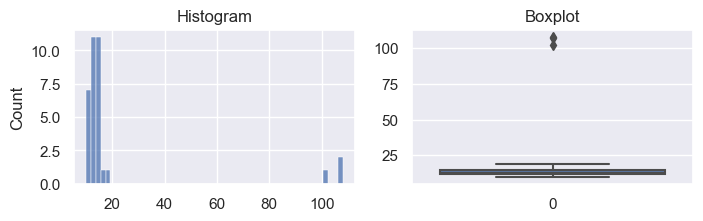

In [91]:
# plot the data
fig, axes = plt.subplots(1, 2, figsize=(8,2))
axes[0].set_title('Histogram')
sns.histplot(df, ax=axes[0])
axes[1].set_title('Boxplot')
sns.boxplot(df, ax=axes[1])
fig.show()

In [92]:
# finding outliers
def detect_outliers(data):
    outliers = []
    threshold = 3 # define a threshold as 3 standard deviations from the mean
    mean = np.mean(data) # mean of data values
    std = np.std(data) # standard deviation using numpy

    # going through each observation in our dataset
    for i in data:
        z_score = (i-mean)/std # calculating z_score
        if np.abs(z_score) > threshold: # if absolute value of z_score larger than 3 (sd)
            outliers.append(i) # add it to outliers list
    return outliers

In [93]:
# print out our outliers
detect_outliers(df)

[102, 107, 108]

In [94]:
# find outliers using IQR
df = sorted(df) # sort dataset
Q1, Q3 = np.percentile(df, [25, 75]) # find quartiles
IQR = Q3 - Q1 # calculate IQR
lower = Q1-1.5*IQR # lower fence
upper = Q3+1.5*IQR # upper fence

for i in df:
    if i < lower or i > upper:
        print(i, end=' ')

102 107 108 

## Hypothesis Testing

__Null Hypothesis ($H_0$)__ - no significant differences between the sample mean and population mean. Two possibilities a re the same. The observed difference is due to a chance only.

__Alternative Hypothesis ($H_1$)__ - there's significant deviation between the sample mean and population mean.

__Type 1 Error__ - a fault when null hypothesis ($H_0$) is rejected, even though it is accurate (accepted alternative hypothesis ($H_1$), but null hypothesis ($H_0$) is correct) - 'False Positive'

__Type 2 Error__ - a fault when one fails to reject a null hypothesis that is actually false (accepted null hypothesis ($H_0$) when alternative hypothesis ($H_1$) is correct) 'False Negative'

__p-value__ - the probability of obtaining such or even greater deviation from the mean value, if $H_0$ is true. The smaller _p_, the more reason to reject $H_0$ and accept $H_1$.

p <= 0.05 -> we reject the Null Hypothesis
p > 0.05 -> we reject the Alternative Hypothesys

__Significance value__ - $\alpha$ it is usually equal to $p$ and is 0.05

## Central Limit Theorem

__Point Estimate__ - the value of any statistic that estimates the value of a parameter ($\bar{x} \rightarrow \mu$)

__Central Limit Theorem__ - within repeated experiment, selective observation means are symmetrically distributed around the population mean, and the standard deviation of such distribution of sample means is the _standard mean error_

__Standard Error (standard mean error)__ - is the standard deviation of its sampling distribution (an estimate of that standard deviation) (usually for $n \ge 30$)
$$se = \frac{\sigma}{\sqrt{n}}$$

## Z-Test

__z-test__ - statistical hypothesis testing technique which is used to test the Null Hypothesis in relation to the following given that the _population standard deviation_ is known and data is normally distributed

__One-sample z-test for means__ - check that there's no difference between the sample and the population (or the diff is not significant). Here, the sample mean is compared against the population mean:
1) Find by how many standard deviations (the value of $z$) the experimental sample mean differs from the estimated population mean:
$$z=\frac{\bar{x}-\mu}{se}=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$
2) Determine what percentage of values are in interval $[-\infty; -z]\cup[z;+\infty]$ (it is a _p-value_)*
3) If _p-value_ < 0.05 we accept $H_1$ (or $z>1.96, x<-1.96 $), so we found a statistically significant deviation

\* - p-value (area) found from the z-table according to the z value found (1-cdf(z))

__Two-sample z-test for means__ - check that there's no difference between the two populations (or the diff is not significant):
$$z_2 = \frac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

In [95]:
# calculate p-value for normal distribution.
'''
x_mean - sample mean
M_mean - population mean
sd - population standard deviation
n - number of observations in the sample
'''

def calc_pvalue_norm(M_mean, x_mean, sd, n):
    se = sd/(n**(1/2)) # standard error
    z = abs((x_mean-M_mean)/se) # z-score
    p = (1 - stats.norm.cdf(z))*2
    return p
print(f'p = {calc_pvalue_norm(102, 98, 10, 64)}')

p = 0.0013742758758317208


__Confidence Interval__ - is a range of estimates for a parameter. It is computed at a designated _confidence level_, which is commonly 95%:
 - Confidence Interval = Point Estimate $\pm$ Margin of Error:
$$\bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

__95% Confidence Interval__ - when $\alpha = 0.05$ (which is common), then it equals:
$$\bar{x} \pm 1.96\sigma$$

__99% Confidence Interval__ - when $\alpha = 0.01$, then it equals:
$$\bar{x} \pm 2.58\sigma$$

In [96]:
# find the confidence interval
'''
M_mean - population mean
sd - sample standard deviation
n - number of values in the sample
accuracy - interval accuracy (95 or 99)
'''
def conf_interval_norm(M_mean, sd, n, accuracy):
    se = sd/(n**(1/2)) # sample standard error
    if accuracy == 95:
        di_1 = M_mean - se*1.96
        di_2 = M_mean + se*1.96
        print(f'Mean confidence interval = [{di_1}; {di_2}]')
    elif accuracy == 99:
        di_1 = M_mean - se*2.58
        di_2 = M_mean + se*2.58
        print(f'Mean confidence interval = [{di_1}; {di_2}]')

conf_interval_norm(7, 4, 100, 95)

Mean confidence interval = [6.216; 7.784]


## Comparing Means

## T-Test

__t-test__ - is used when the _population standard deviation_ is unknown (we have only sample sd ($s$)), the data belongs to normal distribution and sample size is small (<30).
$$\bar{x} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$$

__Conditions for t-test__:
 - Independence of observations
 - Dispersion homogeneity (dispersions of the samples are equal (Fisher's test))
 - Normal distribution of the sample
 - Sample size < 30

__Student's distribution__ - the shape of the distribution is determined by the number of _degrees of freedom_. As the _degrees of freedom_ increase, the distribution tends to _normal_
$$df = n-1$$

__One-Sample t-test__ - check that there's no difference between the sample and the population when the _population sd_ is unknown or sample size is <30:
$$t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$

In [97]:
# finding p-value and confidence intervals for Student's distribution
'''
x_mean - sample mean
M_mean - population mean
sd - sample standard deviation
n - number of values in the sample
accuracy - interval accuracy (95 or 99)
'''

def calc_pvalue_t(M_mean, x_mean, sd, n):
    se = sd/(n**(1/2)) # sample standard error
    t = abs((x_mean - M_mean)/se) # t-test
    df = n-1 # degrees of freedom
    p = (1 - stats.t.cdf(t, df))*2 # p-value
    return p

def conf_interval_t(M_mean, sd, n, accuracy):
    se = sd/(n**(1/2)) # sample standard error
    df = n-1 # degrees of freedom
    if accuracy == 95:
        di_1 = M_mean - se*stats.t.ppf(0.975, df)
        di_2 = M_mean + se*stats.t.ppf(0.975, df)
        print(f'Confidence Interval For Mean: [{di_1}; {di_2}]')
    elif accuracy == 99:
        di_1 = M_mean - se*stats.t.ppf(0.995, df)
        di_2 = M_mean + se*stats.t.ppf(0.995, df)
        print(f'Confidence Interval For Mean: [{di_1}; {di_2}]')

print(f'p-value = {calc_pvalue_t(10, 10.8, 2, 25)}')
conf_interval_t(10, 2, 25, 95)

p-value = 0.0569398499365914
Confidence Interval For Mean: [9.174440575348791; 10.825559424651209]


__Two-Sample t-test__ - to check the difference between the means of two groups (samples):
$$t_2 = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [98]:
# calculate p-value for two-sample t-test comparing two means from two separate samples
'''
x1_mean - 1st sample mean
x2_mean - 2nd sample mean
sd1 - 1st sample standard deviation
sd2 - 2nd sample standard deviation
n1 - number of values in the 1st sample
n2 - number of values in the 2nd sample
'''
def calc_pvalue_t2(x1_mean, x2_mean, sd1, sd2, n1, n2):
    se = math.sqrt(sd1**2/n1 + sd2**2/n2)
    t = abs((x1_mean-x2_mean)/se)
    df = n1 + n2 - 2
    p = (1 - stats.t.cdf(t, df))*2
    return p

print(f'p-value between two samples = {calc_pvalue_t2(89.9, 80.7, 11.3, 11.7, 20, 20)}')

p-value between two samples = 0.015693530077100393


_The difference between z-test and t-test formulas only in the way how standard deviation for sample ($s$) and population ($\sigma$) is calculated ($n-1$ and $N$ respectively)_

## ANOVA

__One-Way ANalysis Of VAriance (ANOVA)__ - is used to test the difference between two or more means
 $$H_0: M_1 = M_2 = ... = M_i$$
 $$H_0: !(M_1 = M_2 = ... = M_i)$$


__$SS_{total}$__ - total sum of squares - the sum of the so-called "within-group" sum of squares and "between-group" sum of squares:
$$SS_{total}=\sum(x_{ij}-M)^2 = SS_{BG} + SS_{WG}$$
$$SS_{BG} = \sum n(M_j-M)^2$$
$$SS_{WG}=\sum(x_{ij}-M_{ij})^2$$
$\text{where } n - \text{number of items in each group}$

__Between-group variability__ - average "between-group" sum of squares:
$$MS_{BG} = \frac{SS_{BG}}{df_{BG}}, \qquad df_{BG} = m - 1$$

__Within-group variability__ - average "within-group" sum of squares:
$$MS_{WG} = \frac{SS_{WG}}{df_{WG}}, \qquad df_{WG} = N - m$$
where:
 $N$ - total number of observations
 $m$ - number of groups

__Fisher criterion (F-test)__ is a discriminant criterion function that is defined by the ratio of the between-class scatter to the within-class scatter:
$$F= \frac{\text{between-group variability}}{\text{within-group variability}}$$
$$F = \frac{MS_{BG}}{MS_{WG}}$$
$$F = \frac{(SS_{BG} / (m-1))}{(SS_{WG} / (N-m))}$$

__An F statistic__ is a value you get when you run an ANOVA test or a regression analysis to find out if the means between three or more populations are significantly different.
 - It’s similar to a T statistic from a t-test;
 - A t-test will tell you if a single variable is statistically significant and an F test will tell you if the groups of variables are jointly significant.

In [99]:
# ANOVA test in pure python
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv', index_col=0)
data.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


<AxesSubplot: xlabel='group', ylabel='weight'>

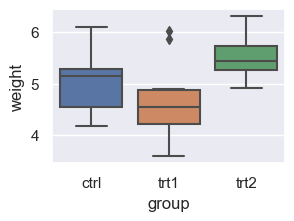

In [100]:
sns.boxplot(data=data, x='group', y='weight')

In [101]:
k = len(pd.unique(data.group)) # number of conditions
N = len(data.values) # conditions times participants
n = data.groupby('group').size()[0] # participants in each group

DF_bg = k-1
DF_wg = N-k
DF_total = N-1

In [102]:
# calculate sum of squares between groups
SS_bg = (sum(data.groupby('group').sum()['weight']**2)/n) - (data['weight'].sum()**2)/N

# sum of squares within
sum_y_squared = sum([value**2 for value in data['weight'].values])
SS_wg = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

# sum of squares total
SS_total = sum_y_squared - (data['weight'].sum()**2)/N

# mean square between groups
ms_bg = SS_bg/DF_bg

# mean squares within groups
ms_wg = SS_wg/DF_wg

# calculating F-value
F = ms_bg/ms_wg

# calculating p-value
p = stats.f.sf(F, DF_bg, DF_wg)

print(f'F = {F}, p = {p}')

F = 4.846087862380118, p = 0.015909958325623124


In [103]:
# the same ANOVA with Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit() # set up the model
aov_table = sm.stats.anova_lm(mod, typ=2)

aov_table

,sum_sq,df,F,PR(>F)
group,3.76634,2.0,4.846088,0.01591
Residual,10.49209,27.0,NaN,NaN


The hypothesis that the means of a given set of normally distributed populations, all having the same standard deviation, are equal. This is perhaps the best-known F-test, and plays an important role in the analysis of variance (ANOVA).

In [104]:
# calculate p-value for Fisher distribution

# assume we have 3 groups
data = [[3, 1, 2],
        [5, 3, 4],
        [7, 6, 5]]

def calc_pvalue_f(array):
    ss_wg = 0
    x_sum = 0
    N = 0
    for group in array:
        x_sum += sum(group)
        N += len(group)
        for i in group:
            ss_wg += (i - sum(group)/len(group))**2
    x_mean = x_sum / N
    ss_bg = 0

    for group in array:
        ss_bg += len(group)*(sum(group)/len(group) - x_mean)**2

    m = len(array)
    F = (ss_bg/(m-1))/(ss_wg/(N-m))
    p = stats.f.sf(F, (m-1), (N-m))
    return p

calc_pvalue_f(data)

0.008000000000000002

If _p-value_ in f-test is less than 0.05 (p < 0.05) we fail to reject the $H_0$, then we say that means are equal.
If _p-value_ in f-test is larger than 0.05, then we reject the Null hypothesis ($H_0:$ no difference in group means) => there are significant differences in group means.
However, we can't say _what_ groups are different and how much.

To understand this we need to perform pairwise comparison of group means - using _Bonferroni correction_ and _Tukey's test_

__Bonferroni correction__ - is a method to counteract the 'multiple comparisons' problem (high probability to get type I error - get false significant differences due to high number of groups).
 P-value here is being corrected by the number of all groups combinations:
$$C^2_m= \frac{m!}{(2!*(m-2)!)}=\frac{m(m-1)}{2}$$
So, the _p-value_ with Bonferroni correction equals:
$$\alpha=\frac{p}{C^2_m}$$
Bonferroni is too conservative for large number of groups

__Tukey HSD (honestly significant difference)__ - is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other by comparing group means pairwise:
$$q=\frac{\bar{X_A}-\bar{X_B}}{SE}$$
where $SE$ is the standard error of the sum of the means.
$$SE = \sqrt{MS_{WG}/m}$$
In fact, Tukey's test is essentially a t-test, except that it corrects for family-wise error rate.


In [105]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
groups = pd.DataFrame({'Values':[5, 1, 2, 3, 4, 2, 5, 3, 2], 'Groups':['A','B','C', 'A', 'A', 'B', 'C', 'C', 'B']})
multi_comp = MultiComparison(groups.Values, groups.Groups)
multi_comp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-2.3333,0.0916,-5.103,0.4363,False
A,C,-0.6667,0.7511,-3.4363,2.103,False
B,C,1.6667,0.2339,-1.103,4.4363,False


## Two-Way ANOVA

__Two-Way ANOVA__ - examines the influence of two different categorical independent variables on one continuous dependent variable. The two-way ANOVA not only aims at assessing the main effect of each independent variable but also if there is any interaction between them.
$$SS_{total} = SS_{WG} + SS_{BGa} + SS_{BGb} + SS_{BGa}*SS_{BGb}$$

In [106]:
# perform two-way ANOVA from scratch
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv', index_col=[0])

# Here we have a data with one dependent variable ('len') and two independent factors ('supp' and 'dose').
# With 2-way ANOVA we'll test the effect of the two factors on our dependent variable as well as the interaction between these factors
data.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


<AxesSubplot: xlabel='dose', ylabel='len'>

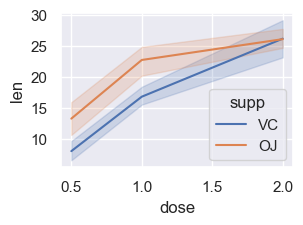

In [107]:
sns.lineplot(data=data, x='dose', y='len', hue='supp')

In [108]:
# find degrees of freedom
N = len(data.len)
df_a = len(data.supp.unique()) - 1 # degrees of freedom of 'supp' group
df_b = len(data.dose.unique()) - 1 # degrees of freedom of 'dose' group
df_axb = df_a * df_b # degrees of freedom of 'supp' x 'dose'
df_w = N - (len(data.supp.unique())*len(data.dose.unique())) # degrees of freedom within groups

# calculate sum of squares (SSt = SSa + SSb + SSaxb + SSwithin)

# grand mean
grand_mean = data['len'].mean() # the grand mean is the mean of all scores of 'len'

# sum of squares of A group - 'supp'
ssq_a = sum([(data[data.supp == supp].len.mean() - grand_mean)**2 for supp in data.supp]) # sum of squares of 'supp' by formula of ss

# sum of squares of B group - 'dose'
ssq_b = sum([(data[data.dose == dose].len.mean() - grand_mean)**2 for dose in data.dose]) # sum of squares of 'dose' by formula of ss

# sum of squares total
ssq_t = sum((data.len - grand_mean)**2) # total sum of squares

# sum of squares within groups (error/residual)
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) + sum((vc.len - vc_dose_means)**2)

# sum of squares interaction (AxB)
ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

# calculation of the mean squares (for each factor, the interaction of the factors and within factors)

# mean square A
ms_a = ssq_a/df_a

# mean square B
ms_b = ssq_b/df_b

# mean square AxB
ms_axb = ssq_axb/df_axb

# mean square within
ms_w = ssq_w/df_w

# Calculate F-statistic - the mean square of each factor and interaction divided by the mean square for within
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

# Obtaining p-values (using scipy.stats.f.sf())
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

# Summarize all the results in a dataframe
results = {'df':[df_a, df_b, df_axb, df_w],
           'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'mean_sq':[ms_a, ms_b, ms_axb, ms_w],
           'F': [f_a, f_b, f_axb, 'NaN'],
           'PR(&gt;F)': [p_a, p_b, p_axb, 'NaN']}
columns = ['df', 'sum_sq', 'mean_sq', 'F', 'PR(&gt;F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 'supp:dose', 'Residual'])


aov_table1


,df,sum_sq,mean_sq,F,PR(&gt;F)
supp,1,205.350000,205.350000,15.571979,0.000231
dose,2,2426.434333,1213.217167,91.999965,0.0
supp:dose,2,108.319000,54.159500,4.106991,0.02186
Residual,54,712.106000,13.187148,NaN,NaN


In [109]:
# the same 2-way ANOVA using Statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table2 = anova_lm(model, type=2)

aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(supp),1.0,205.350000,205.350000,15.571979,2.311828e-04
C(dose),2.0,2426.434333,1213.217167,91.999965,4.046291e-18
C(supp):C(dose),2.0,108.319000,54.159500,4.106991,2.186027e-02
Residual,54.0,712.106000,13.187148,NaN,NaN


## Correlation

__Correlation__ - relationship between two factors. Can be positive, negative or close to zero

__Covariance__ - quantified relationship between variables (getting positive, negative value or zero):
$$Cov(x, y) = \sum_{i=1}^n\frac{(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

__Pearson Correlation Coefficient__ - restricts the value of covariance between -1 to +1 (good for linear properties):
$$r_{xy} = \frac{Cov(x, y)}{\sigma_x\sigma_y}$$

Correlation coefficient = -1.0


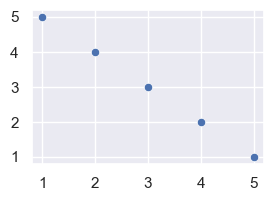

In [110]:
# find the correlation coefficient
array_x = [4, 5, 2, 3, 1]
array_y = [2, 1, 4, 3, 5]

r_xy = stats.pearsonr(array_x, array_y)[0] # it takes 2 arrays of one length & returns a tuple of Pearson's correlation coef and a p_value

print(f'Correlation coefficient = {r_xy}')

sns.scatterplot(x=array_x, y=array_y)
plt.show()

__Pearson Correlation__ is used when relationship is linear and monotonic and the distribution is normal (with minnimum outliers)

When there are many outliers, it's better to try non-parametric analogs - _Spearman Correlation_ or _Kendall Correlation_

__Spearman Correlation__ - is a non-parametric measure of _rank correlation_. It is 1 when the two variables are monotonically related (even if not linear). It denotes the usual Pearson cc, but applied to the rank variables:
$$r_s = \frac{Cov(R(x),R(y))}{R\sigma_xR\sigma_y}$$

__Ranking Variables__ - assigning _rank_ to values (transform values as ranks from min to max)

## Simple Linear Regression

__Simple Linear Regression (One-Way Regression Analysis)__ - is used to analyse relationship of two continuous variables (dependent (criterio) and independent (predictor) variables) - shows how one variable predicts another one.

__Regression Line__ - trend line, a single line that best fits the data, it is described by the linear formula:
$$y = b_0 + b_1*x$$
where:
 $b_1 = \sigma_y / \sigma_x * r_{xy}$ - slope
 $b_0 = \bar{Y} - b_1 * \bar{X}$ - intercept


__Least Square Method__ - the process of finding the best-fitting line of best fit for a set of data points by minimizing the sum of the squares of the residuals of the points from the line.
The target is to find such $b_0$ and $b_1$ so that the regression line reflects the relationship of the variables as good as possible

__Coefficient of Determination $R^2$__ - is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). Shows how much the variance of on variable explained by another variable(s):
$$R^2 = 1- \frac{SS_{res}}{SS_{total}}$$
where:
 - $SS_{res}$ - sum of squares of residuals (sum of residual distances to regression line)
 - $SS_{total}$ - total sum of distances to mean line $y=\bar{Y}$

$R^2 = 1$ means that all the variability in the variable is explained by our regression model

__Conditions__ for Linear Regression:
 1) __Linearity__ of $X$ and $Y$ - check: make a _scatter plot_. If not linear, then:
    - apply _Tukey Ladder of Powers_ - exponentation of $X$
    - _log transformation_ - take a log of $X$ or/and $Y$
    - _Box-Cox transformation_
 2) __Independence of Observations__
 3) __Independence of Predictors__
 4) __Normal Distribution of Residuals__ - check: _Q-Q plot_
 5) __Homoscedasticity__ - equal variance of dependent variable on every level of independent variable (constant residual variance)
 6) __Lack of perfect multicollinearity__ - no autocorrelation of resuduals

In [111]:
# simple regression
data_for_corr = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
data_for_corr.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


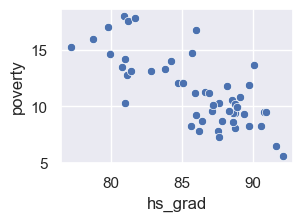

In [112]:
# check the linearity between X and Y (predictor and dependent variable)
sns.scatterplot(data_for_corr, x='hs_grad', y='poverty')
plt.show()

In [113]:
# get the variables
x_array = data_for_corr.hs_grad
y_array = data_for_corr.poverty

# calculate means
x_mean = x_array.mean()
y_mean = y_array.mean()

# standard deviations
x_sd = statistics.stdev(x_array)
y_sd = statistics.stdev(y_array)

# min and max values
x_min = x_array.min()
y_min = y_array.min()

x_max = x_array.max()
y_max = y_array.max()

# calculate covariance and correlation coefficients
N = len(data_for_corr)
cov_xy = sum([(x_i - x_mean)*(y_i - y_mean) for x_i, y_i in zip(x_array, y_array)])/(N-1)
r_xy = cov_xy/(x_sd*y_sd)
# or r_xy = stats.pearsonr(x_array, y_array)

# combine altogether in a table
result = {'N': [N, N],
          'Mean': [y_mean, x_mean],
          'St.Dev': [y_sd, x_sd],
          'Min': [y_min, x_min],
          'Max': [y_max, x_max]}
columns = ['N', 'Mean', 'St.Dev', 'Min', 'Max']
result_table = pd.DataFrame(result, columns=columns, index=['poverty', 'hs_grad'])

print(result_table)
print(f'\nCorrelation coefficient = {r_xy}')
print(f'R-squared = {r_xy**2}')

          N       Mean    St.Dev   Min   Max
poverty  51  11.349020  3.099185   5.6  18.0
hs_grad  51  86.011765  3.725998  77.2  92.1

Correlation coefficient = -0.7468582531582505
R-squared = 0.5577972503105934


In [114]:
# linear regression with statsmodels
from statsmodels.formula.api import ols # ols - Ordinary Least Squares model
model = ols('poverty ~ hs_grad', data=data_for_corr).fit()
print(model.params)
print(model.summary())

Intercept    64.780966
hs_grad      -0.621217
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           3.11e-10
Time:                        16:51:22   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

y = 64.78 + (-0.62)x


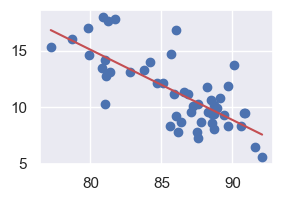

In [115]:
# plot a regression line
b1 = y_sd / x_sd * r_xy
b0 = y_mean - b1*x_mean

print(f'y = {b0:.2f} + ({b1:.2f})x')

x_values = np.linspace(x_min, x_max, 10) # an array from 10 values from 'x_min' to 'x_max'
y_values = b0 + b1*x_values

plt.plot(x_array, y_array, 'ob') # our data values
plt.plot(x_values, y_values, 'r') # regression line
plt.show()

__Conclusions:__
 - p-value < 0.05, so we reject Null Hypothesis that there's no relationship between 'poverty' and 'hs_grad'
 - In state where 'hs_grad' == 0 (theoretically), there will be 64.78% (b0, intercept) of people living in 'poverty'
 - With every 1% increase of 'hs_grad', the number of people in 'poverty' will decrease by 0.62% (b1)
 - About 56% ($R^2$) of variance of our dependent variable explained by our regression model (hs_grad)
 - Regression line $y = 64.78 - 0.62x$ allows to predict 'poverty' based on 'hs_grad'

## Multiple Linear Regression

__Multiple Linear Regression__ - allows to explore the influence of _several independent variables_ at once on one dependent variable:
$$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$

__Adjusted $R^2$__ - corrected coefficient of determination. It is calculated when additional independent variables are included in the model

In [116]:
data_for_corr.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [117]:
# create a fitted model with all features
lm = ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=data_for_corr).fit()

# print the coefficients
print(lm.params)

# print a summary of the model
print(lm.summary())

Intercept       66.476525
metro_res       -0.056323
white           -0.048144
hs_grad         -0.554713
female_house     0.050543
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           8.88e-10
Time:                        16:51:22   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.

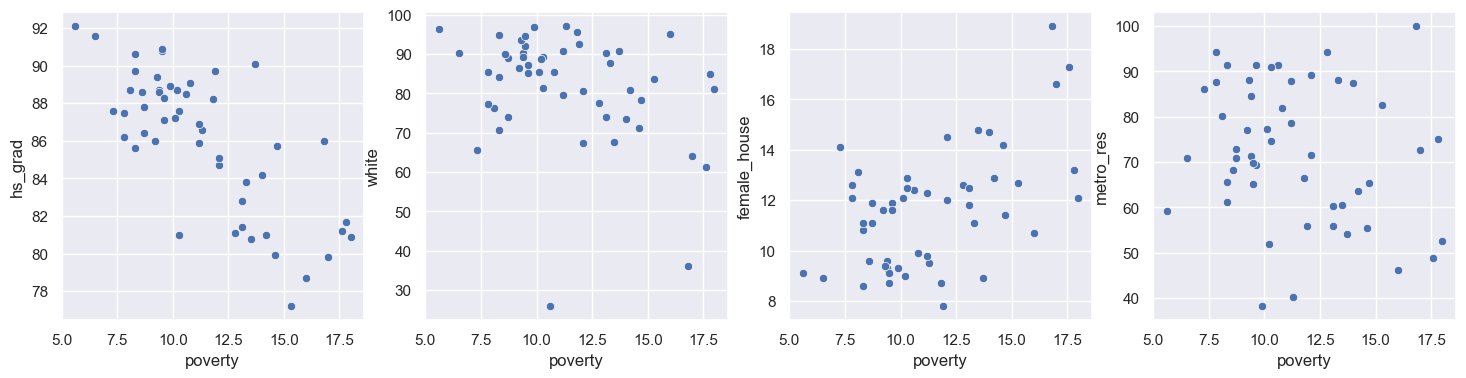

In [118]:
# visualization
fig, axes = plt.subplots(1, 4, sharey=False, figsize=(18, 4))
sns.scatterplot(data_for_corr, x='poverty', y='hs_grad', ax=axes[0])
sns.scatterplot(data_for_corr, x='poverty', y='white', ax=axes[1])
sns.scatterplot(data_for_corr, x='poverty', y='female_house', ax=axes[2])
sns.scatterplot(data_for_corr, x='poverty', y='metro_res', ax=axes[3])
plt.show()

__Conclusions:__
 - Regression equation: 'poverty' = 66.4765 + (-0.0563)\*'metro_res' + (-0.0481)\*'white' + (-0.5547)\*'hs_grad' + 0.0505\*'female_house'
 - There will be about 66.5% of people living in poverty in the state where all the levels = 0
 - We got _p-value < 0.05_ only for 'metro_res' and 'hs_grad', so only these two variables have a significant relation with our dependent variable ('poverty')
 - 61% (Adj. $R^2$) of the 'poverty' variance explained by the model

__Conditions for Multiple Linear Regression__:
 1) Linearity
 2) Normal residuals distribution
 3) Homoscedacity
 4) Normal distribution of the variables
 5) Check for Multicolinearity (remove one of the two variables that correlate heavily between each other)

In [119]:
# check for multicolinearity
data_for_corr.corr()

/var/folders/qq/03jhx7pd7dj5zpb771243k3m0000gn/T/ipykernel_76291/236607766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_for_corr.corr()


,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


_We see in the table above that 'female_house' correlate with all the variables, so it's better to remove it from our model_

In [120]:
# Let's find the best set of variables that gives the highest R^2
features = {'metro_res', 'white', 'hs_grad', 'female_house'}

# recursively iterate over all combinations of variables
def combs(params, formula, result):
    if not params:
        result.add(formula.lstrip('+'))
        return
    else:
        new_params = params.copy()
        for elt in params:
            new_params.remove(elt)

            combs(new_params, formula + '+' + elt, result)
            combs(new_params, formula, result)

res = set()
combs(features, '', res)
res.remove('')

# now calculate Adjusted R-Squared for each combination
for formula in res:
    lm = ols(formula='poverty~' + formula, data=data_for_corr).fit()
    print(f'{lm.rsquared_adj:.4f}', formula)


0.5488 hs_grad
0.5499 hs_grad+white+female_house
0.1708 white+metro_res
0.5582 hs_grad+white
0.6011 hs_grad+metro_res+female_house
0.6104 hs_grad+white+metro_res+female_house
0.2613 female_house
0.2637 white+female_house
0.3869 white+metro_res+female_house
0.5773 hs_grad+metro_res
0.0767 white
0.0222 metro_res
0.6183 hs_grad+white+metro_res
0.5472 hs_grad+female_house
0.3958 metro_res+female_house


__Conclusion__: combination of features 'white + metro_res + hs_grad' gives the best result with $Adj.R^2 = 0.6183$

In [121]:
# Final model
lm = ols('poverty~white + metro_res + hs_grad', data=data_for_corr).fit()

print(lm.params)
print(lm.summary())

Intercept    68.722015
white        -0.053327
metro_res    -0.055532
hs_grad      -0.569724
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.55e-10
Time:                        16:51:24   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## Categorical Data Analysis

__Probability Mass Function (PMF)__ - a function that gives the probability that a discrete random variable is equal to some value

__Bernoulli's Distribution__ - discrete probability distribution with 2 outcomes (0 or 1) - tossing a coin - a single trial
$p \in [0, 1]$ - success probability
$k\in\{0,1\}$ - number of successes
PMF: $$f(k, p) = \begin{cases} p \text{               if } k=1\\
q=1-p \text{    if } k=0\\
\end{cases}$$
or $$f(k, p)=p^k(1-p)^{1-k}, \qquad k\in\{0, 1\}$$

__Binomial Distribution $B(n,p)$__ - Bernoulli's distribution for multiple trials
$n \in \{0, 1, 2,...\}$ - number of trials
$p \in [0, 1]$ - success probability for each trial
$q=1-p$
$k\in\{0,1,2,...,n\}$ - number of successes
PMF: $$f(n,k)={n\choose k}p^kq^{n-k} $$

## Chi-Square Test

__Pearson's Chi Squared Test__ - checks if there's a significant difference between the frequencies in one or more categories of a contingency table. It is a non-parametric test that is performed on categorical data to analyze the relationship between the observed and expected values:
 1) Define $H_0$ and $H_1$:
    - $H_0$ - frequency distribution is equal (indistinguishable) to expected
    - $H_1$ - frequency distribution is different than expected
 2) Get the $\alpha$ (usually given as 0.05)
 3) Calculate _degrees of freedom_ $=n-1$, where $n$ is number of categories
 4) Go to _Chi Squared table_ to find decision boundary (2-tail test)
 5) If $\chi^2 > 5.9$ (for $df = 2$ and $\alpha = 0.05$) then we reject $H_0$
$$\chi^2 = \sum\frac{(O_i - E_i)^2}{E_i}$$
where $\chi^2$ - chi-square, $O_i$ - observed frequency (value), $E_i$ - expected frequency (value)

For $df=2$, 95% of frequencies lie inside [0, 5.9] interval of $\chi^2$ values and $p > 0.05$.
Therefore, if $\chi^2 > 5.9$ or $p < 0.05$, then we reject $H_0$ and conclude that frequencies are significantly different


In [122]:
# calculate chi-square and p-value
chi2_value, chi2_pvalue = stats.chisquare(f_obs=[18, 55, 27], f_exp=[25, 50, 25]) # f_obs - observed frequencies, f_exp - expected frequencies

print(f'Chi-square = {chi2_value:.2f}, p_value = {chi2_pvalue:.2f}')

Chi-square = 2.62, p_value = 0.27


In [123]:
# calculate many values are inside the interval between 2 and 4 of chi-square values with 2 degrees of freedom
chi2_down = stats.chi2.cdf(2, 2)
chi2_up = stats.chi2.cdf(4, 2)

chi2_interval = chi2_up - chi2_down

print(f'{chi2_interval*100:.2f}%')

23.25%


## Contingency Tables Analysis

__Contingency Tables Analysis__ - the rows represent values of one categorical variable, while the columns denote the values of another
__Target__ - examine the relationship between two nominative variables:
 - $H_0$ - frequency distribution indistinguishable from expected
 - $H_1$ - frequency distribution is different than expected, so nominative variables interconnected

__How to calculate Expected values?__
$$f_{ij} = \frac{f_i*f_j}{N}$$
where:
 - $f_i$ - row sum
 - $f_j$ - column sum
 - $N$ - number of observations

__Observed Values__:

|             | Feature 2-0 | Feature 2-1 | $\sum$              |
|-------------|-----------|-------------|---------------------|
| Feature 1-0 | $a$       | $b$         | $a + b$             |
| Feature 1-1 | $c$       | $d$         | $c + d$             |
| $\sum$      | $a + c$   | $b + d$     | $n = a + b + c + d$ |

__Expected Values__:

|             | Feature 2-0             | Feature 2-1             | $\sum$              |
|-------------|-------------------------|-------------------------|---------------------|
| Feature 1-0 | $\frac{(a+c)*(a+b)}{n}$ | $\frac{(b+d)*(a+b)}{n}$ | $a+b$               |
| Feature 1-1 | $\frac{(a+c)*(c+d)}{n}$ | $\frac{(b+d)*(c+d)}{n}$ | $c+d$               |
| $\sum$      | $a + c$                 | $b + d$                 | $n = a + b + c + d$ |

To find a solution we use Chi-square $\Chi^2$ with the following degrees of freedom:
$$df = (n-1)\cdot(m-1)$$
where $n$ - number of columns in the table, $m$ - number of rows

__Yates's Correction (Yates's chi-squared test)__ - aims at correcting the error introduced by assuming that the discrete probabilities of frequencies in the table can be approximated by a continuous distribution:
$$X^2_{Yates} = \sum{\frac{(|O_i-E_i|-0.5)^2}{E_i}}$$
_Yates's correction_ is used when the number of observed and expected values more than 5 but less than 10

In [124]:
# calculate expected values, degrees of freedoms, chi-square and p-value
observed = [[18,7], [6, 13]]
chi2_value, p_value, df_value, expected = stats.chi2_contingency(observed, correction=False) # correction - Yates's correction (False here)

print(f'Chi-square = {chi2_value:.2f} \np-value = {p_value:.3f} \ndf = {df_value}')
print(f'\nExpected values:\n{expected}')

Chi-square = 7.11 
p-value = 0.008 
df = 1

Expected values:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


__Conditions for $X^2$ for contingency table analysis__:
 - All observations are independent
 - Minimum number of observations in each table cell > 5

__Fisher's exact test__ - used when conditions for $X^2$ are not met (small number of observations -> <5 in each cell):
$$\frac{C^a_{a+b}\cdot C^c_{c+d}}{C^{a+c}_n}$$

In [125]:
# calculate p-value using Fisher's exact test
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])

p_value

0.48571428571428565

## Logistic Regression

__Logistic Regression__ - a model that tests the relationship between nominative dependent variable with two possible outcomes and various independent variables (can be both numerical and categorical).

$p$ - probability of one outcome of the dependent variable
$1-p$ - probability of the second outcome
So, the model is the following:
$$[0,1] \ni \quad p_i=\beta_0+\beta_1x_{1,i}+\beta_2x_{2,i}+...+\beta_kx_{k,i}\quad \in [-\infty,+\infty]$$

__Odds__ - a measure of the likelihood of a particular outcome. It is the ratio of the probability of success to probability of failure:
$$Odds = \frac{p}{1-p}\qquad \in [0, +\infty]$$

__Log Odds__ - log of odds $=logit(p) \in(-\infty, +\infty)$
$$logit(p) = \log(\frac{p}{1-p}) = \beta_0+\beta_1x_1$$
$$p=\frac{\exp(\beta_0+\beta_1x_1)}{1+\exp(\beta_0+\beta_1x_1)}=\frac{\exp(\log(\frac{p}{1-p}))}{1+\exp(\log(\frac{p}{1-p}))}$$

| $p$   | $1-p$       | $odds=\frac{p}{1-p}$   | $log odds=logit(p)$ | $p \text{ from log odds}$                      |
|-------|-------------|------------------------|---------------------|------------------------------------------------|
| $0.2$ | $1-0.2=0.8$ | $\frac{0.2}{0.8}=0.25$ | $\log(0.25)=-1.38$  | $\frac{\exp(logit(p))}{1+\exp(logit(p))}= 0.2$ |
| $0.5$ | $1-0.5=0.5$ | $\frac{0.5}{0.5}=1$ | $\log(1)=0$ | $\frac{\exp(logit(p))}{1+\exp(logit(p))}= 0.5$             |
| $0.8$ | $1-0.8=0.2$ | $\frac{0.8}{0.2}=4$ | $\log(4)=1.38$ | $\frac{\exp(logit(p))}{1+\exp(logit(p))}=0.8$             |

__Intercept Only Model__ - model without predictors: $y=intercept$
__Intercept__ here is the log of odds of success: $intercept=logodds=logit(p)=\log(p/(1-p))$

$H_0$ - no difference between outcome 1 and outcome 2 and normal distribution describes coefficient of logistic regression
 - $p=1-p$
 - $odds=1$
 - $logit(p)=0$

_Suppose we have a task to analyze the probability of getting this or even bigger difference of intercept from 0 provided that the Null Hypothesis is true_:
 - run the intercept only model and get the intercept (log odds of success)
 - calculate standard error _(se)_ of a normal distribution with _intercept=0_
 - get the z-score by dividing _intercept_ by _standard error_ - distance to 0 in the number of standard deviations
 - calculate p-value from z-score to find a probability of such deviation

__Model with one categorical predictor__ - outcome depends on one variable. For example, 'Surviving' ~ 'Sex':
<br>

|  | Female | Male |
| --- | --- | --- |
| No | 64 | 360 |
| Yes | 197 | 93 |

_odds_male_$=93/360=0.26$
_odds_female_$=197/64=3.08$
_odds_ratio_=_odds_male_ / _odds_female_
_intercept_ - log of odds of surviving of females - $\log(\text{odds_female})=\log(3.08)=1.12$
$\beta_1$ - coefficient of $x$ - log of ratio of odds of surviving of males and females: $\log(\text{odds_ratio})=\log(\text{odds_male})-\log(\text{odds_female})$
_As odds_male and odds_female are mutually dependent (multicolinear), we use only one of them in our model:_
$$\log(odds) = Intercept + b_1*SexMale$$
$\log(\text{odds_to_survive_being_female}) = 1.12 + (-2.48)*0=1.12$ <br>
$\log(\text{odds_to_survive_being_male}) = 1.12 + (-2.48)*1=-1.35$

_Unlike the $x^2$ test, logistic regression not only indicated that the two variables were related, but also showed the odds for different gradations of the independent variable_

In [126]:
# Logistic regression with one categorical predictor
category_columns = {col:'category' for col in ['Survived', 'Sex']}

data_titanic = sns.load_dataset('titanic')
data_titanic = data_titanic[data_titanic.age.notnull()]
data_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [127]:
from statsmodels.tools import add_constant
from statsmodels.formula.api import glm # a flexible generalization of ordinary linear regression

# dependent variable (categorized)
Y = data_titanic.loc[:, 'survived'].astype('category').cat.codes

# categorize variable 'sex' - independent predictor with 2 gradations
X = add_constant(data_titanic.loc[:, 'sex'].astype('category').cat.codes) # 'add_constant' adds a column of ones to an array

# calculate logistic regression using statsmodels
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Fri, 02 Dec 2022   Deviance:                       750.70
Time:                        16:51:24   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.144      7.814      0.000       0.842       1.406
0             -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==============================================================================
"""

In [128]:
# r-style glm
glm_binom_rstyle = glm(formula='survived~sex', data=data_titanic, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()
res_rstyle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Fri, 02 Dec 2022   Deviance:                       750.70
Time:                        16:51:24   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1243      0.144      7.814      0.000       0.842       1.406
sex[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
===============================================================================
"""

__Model with two categorical predictors__ - outcome depends on two variables. For example, 'Surviving' ~ 'Sex' + 'Class':

<br>

|          | Female  ||||      Male |||
|----------|:-------:|:---------:|:-------:|---|:--------:|:------:|:-----:|
| Survived |  First  |  Second   |  Third  | |  First    | Second |  Third |
| No       |    3    |     6     |   55    | |    61    |   84   |  215  |
| Yes      |   82    |    68     |   47    | |   40    |   15   |  38   |

_Regression quotation:_

$$\log(odds)= intercept + \beta_1 *SexMale + \beta_2 *PclassSecond + \beta_3 *SexMale*PclassSecond + \beta_4*SexMale*PclassThird$$

In [129]:
glm_binom_rstyle_2 = glm(formula='survived~sex+pclass', data=data_titanic, family=sm.families.Binomial()).fit()
glm_binom_rstyle_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -336.26
Date:                Fri, 02 Dec 2022   Deviance:                       672.51
Time:                        16:51:24   Pearson chi2:                     734.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3357
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3468      0.323     10.355      0.000       2.713       3.980
sex[T.male]    -2.5739      0.203    -12.680      0.000      -2.972      -2.176
pclass         -0.9910      0.118     -8.383      0.000      -1.223      -0.759
===============================================================================
"""

__Mixed Regression Model__ - a model that includes both numerical and categorical variables: 'Surviving ~ 'Sex' + 'Pclass' + 'Age', where 'Age' is numerical variable

In [130]:
glm_binom_rstyle_3 = glm(formula='survived~sex+pclass+age', data=data_titanic, family=sm.families.Binomial()).fit()
glm_binom_rstyle_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      710
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.65
Date:                Fri, 02 Dec 2022   Deviance:                       647.29
Time:                        16:51:24   Pearson chi2:                     768.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0560      0.502     10.069      0.000       4.072       6.040
sex[T.male]    -2.5221      0.207    -12.168      0.000      -2.928      -2.116
pclass         -1.2885      0.139     -9.253      0.000      -1.561      -1.016
age            -0.0369      0.008     -4.841      0.000      -0.052      -0.022
===============================================================================
"""

## Nonparametric Methods

__Non-parametric test__ - is usually occurs with respect to population proportion

## W-Test

__Wilcoxon signed-rank test__ - a non-parametric analog of one-sample t-test.
 - The Wilcoxon signed-rank test can be used to test whether data comes from a symmetric population with a specified median
 - If the population median is known, then it can be used to test whether data is symmetric about its center.
 - If t-test calculates the difference in means, then Wilcoxon calculates the difference of ranks between two _dependent_ groups

1) Calculate the difference of ranks between each group
2) Sum up ranks of positive differences from 1) $T^+=\sum{\text{(ranks positive)}}$
3) Sum up ranks of negative differences from 1) $T^-=\sum{\text{(ranks negative)}}$
4) Choose the min between 2) and 3) $W = \min{(T^+, T^-)}$
5) Calculate expected value of $W$: $u_W=\frac{n(n+1)}{4}$
6) Compare expected $u_W$ with calculated $W$ - finding $z$-score: $z=\frac{W-u_W}{\sigma_W}$, where $\sigma_W=\sqrt{\frac{n(n+1)(2n+1)-\sum{\frac{t^3_i-t_i}{2}}}{24}}$

## U-Test

__Mann–Whitney U-test (Wilcoxon rank-sum test)__ - a non-parametric analog of the two-sample t-test.
 - It is a test of the Null Hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.
 - It is used to analyze the difference between independent rank-scaled samples.
 - Here we compare sum of ranks in two samples instead of their means:
$$U_1 = R_1-\frac{n_1*(n_1+1)}{2}$$
$$U_2 = R_2-\frac{n_2*(n_2+1)}{2}$$

where: $R_1, R_2$ - sums of ranks in 2 samples and $n_1, n_2$ - number of observations in samples

The min between $U_1$ and $U_2$ is the u-test statistic.

If Null Hypothesis is true, then distribution of this statistic is normal with:
$$\mu=\frac{n_1*n_2}{2} \text{   and   }\sigma=\sqrt{\frac{n_1*n_2*(n_1+n_2+1)}{12}}$$
_This helps to calculate the probability of having this or greater differences of rank sums._

## H-Test

__Kruskal–Wallis test by ranks, Kruskal–Wallis H-test__ - it is the nonparametric analog of one-way ANOVA.

 - It is a non-parametric method for testing whether samples originate from the same distribution.
 - It is used for comparing two or more independent samples (_unlike Mann-Whitney test_) of equal or different sample sizes.
 - It is a _dispersion_ of mean ranks in the samples.
 - If Null Hypothesis is true, then the distribution of H-statistics can be described with _Chi-square_:
$$H=\frac{12}{N(N+1)}\sum_{i=1}^k{\frac{R^2_i}{n_i}-3(N+1)}, \qquad N=\sum_{i=1}^kn_i$$

## Bonus!!!

## K-Means Clustering

__K-means Clustering__ - is a method to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid), serving as a prototype of the cluster.

_Algorithm:_
 1) Define the number of clusters we want/need to split our data
 2) Choose the initial centroid positions (randomly, or by some methods)
 3) For each point we determine which centroid it is closest to (assign to centroid)
 4) Update the centroids by calculating the mean of observations in each group (groups from the previous step)
 5) Reassign points (repeat step 3)
 5) If the belongings of some points have changed, then repeat from point 4, otherwise stop

_There are following solutions that help to avoid the problems due to an element of randomness in the method_:
 - Farthest points - take initial centroid positions which are as far as possible between each other
 - Perform _k-means clustering_ multiple times
 - Change the number of clusters - add cluster and test whether this cluster addition decrease the total within-cluster sum of squares, if yes, then proceed with new number of clusters


In [131]:
# k-means with sklearn
from sklearn.cluster import KMeans

X = np.array([[-3, 3], [1,4], [2,6], [3, 8], [5, 2], [6, 11], [7, 1]])

# kmeans model with 1 cluster
kmeans = KMeans(n_clusters=1).fit(X)

# centroid position
print(kmeans.cluster_centers_)

# sum of squares of distances between points and centroid
print(kmeans.inertia_)

[[3. 5.]]
146.0


## Roadmap of Choosing Statistical Methods

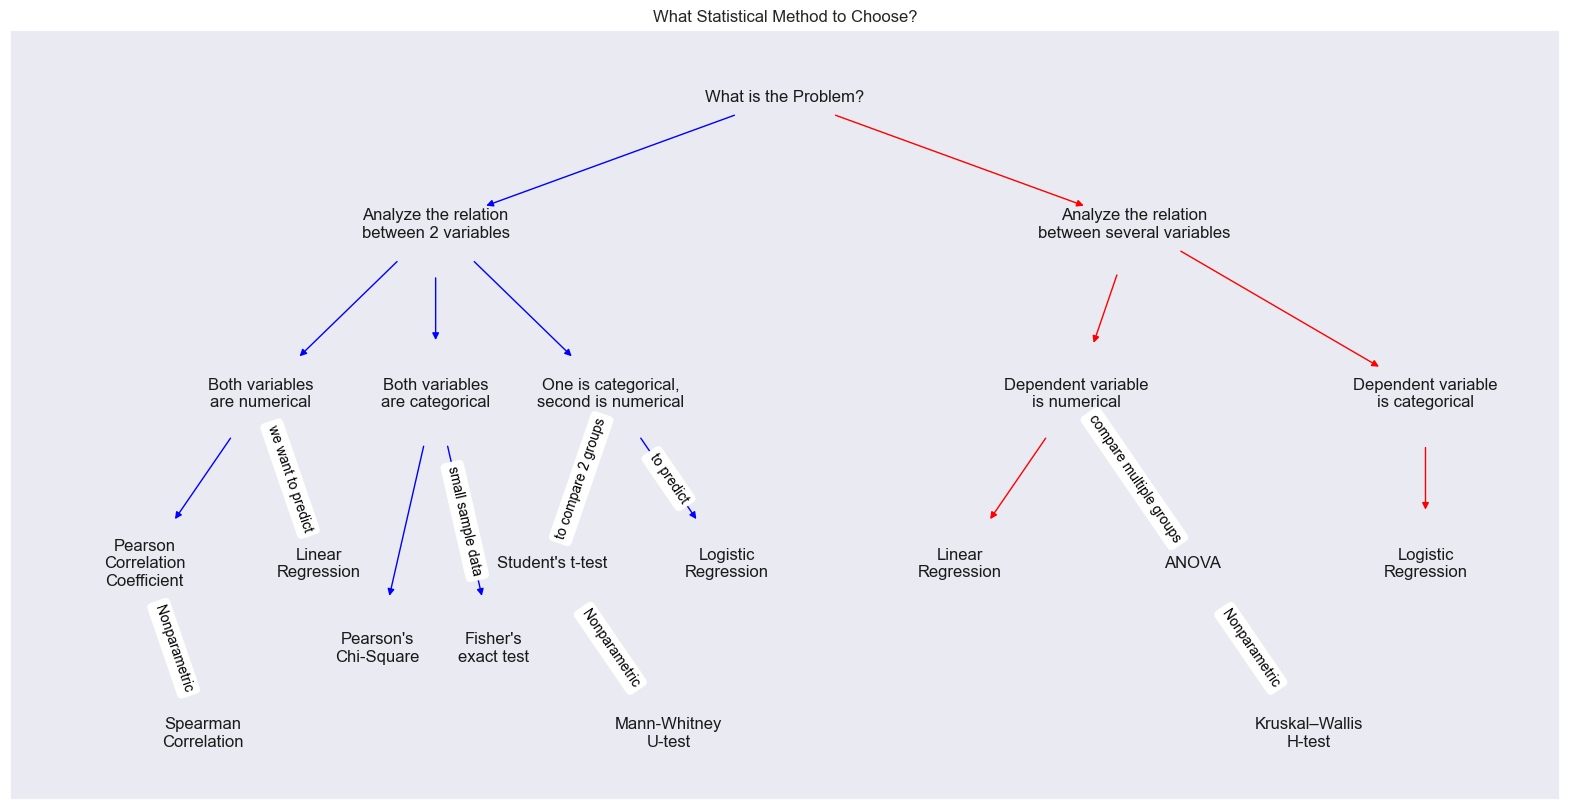

In [132]:
import networkx as nx
fig = plt.figure(figsize=(20, 10))

G = nx.DiGraph()

nodes = np.arange(0, 8).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2), (1,3), (1, 4), (1, 5), (2, 6), (2,7), (3, 8), (3, 9), (4, 10), (4, 11), (5, 12), (5, 13), (6, 14), (6, 15), (7, 16), (8, 17), (12, 18), (15, 19)])
pos = {0:(11.5, 11.5),
       1:(8.5, 10),
       2:(14.5, 10),
       3:(7, 8),
       4:(8.5, 8),
       5:(10, 8),
       6:(14, 8),
       7:(17, 8),
       8: (6, 6),
       9: (7.5, 6),
       10: (8, 5),
       11: (9, 5),
       12: (9.5, 6),
       13: (11, 6),
       14: (13, 6),
       15: (15, 6),
       16: (17, 6),
       17: (6.5, 4),
       18: (10.5, 4),
       19: (16,4)
       }

labels = {0: 'What is the Problem?',
          1: 'Analyze the relation\nbetween 2 variables',
          2: 'Analyze the relation\nbetween several variables',
          3: 'Both variables\nare numerical',
          4: 'Both variables\nare categorical',
          5: 'One is categorical,\nsecond is numerical',
          6: 'Dependent variable\nis numerical',
          7: 'Dependent variable\nis categorical',
          8: 'Pearson\nCorrelation\nCoefficient',
          9: 'Linear\nRegression',
          10: 'Pearson\'s\nChi-Square',
          11: 'Fisher\'s\nexact test',
          12: 'Student\'s t-test',
          13: 'Logistic\nRegression',
          14: 'Linear\nRegression',
          15: 'ANOVA',
          16: 'Logistic\nRegression',
          17: 'Spearman\nCorrelation',
          18: 'Mann-Whitney\nU-test',
          19: 'Kruskal–Wallis\nH-test'
          }



edge_colors = ["blue", "red",
               "blue","blue", "blue","red", 'red',
               'blue', 'blue', 'blue', 'blue','blue','blue', 'red','red','red',
               'brown', 'brown', 'brown']
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,
                 node_shape = "", node_size = 3000,
                 edge_color = edge_colors)  #color of the edges

nx.draw_networkx_edge_labels(G, pos = pos,
                             edge_labels={(15, 19): 'Nonparametric',
                                          (12, 18): 'Nonparametric',
                                          (8,17): 'Nonparametric',
                                          (3, 9): 'we want to predict',
                                          (4, 11): 'small sample data',
                                          (5, 12): 'to compare 2 groups',
                                          (5, 13): 'to predict',
                                          (6, 15): 'compare multiple groups'},
                             font_color='black')
plt.title('What Statistical Method to Choose?')
#plt.savefig('data/roadmap_stats.jpeg', dpi = 300)
plt.grid(visible=None)
plt.show()

|                                              | Type of Data            |||||                                         |     |
|----------------------------------------------|-------------------------|-----------------------------------------|---|---|---|
| __Goal__                                     | __Normal Distribution__ | __Rank, Score, or non-Normal Distribution__ | __Binomial__ |
| Describe one group                           | mean, SD                | Median, IQR                             | Proportion |
| Compare one group to a value (or population) | One-Sample t-test       | Wilcoxon single-rank W-test                           | Chi-Square or Binomial test |
| Compare two groups                           | Two-Sample t-test       | Mann-Whitney U-test                     | Fisher's test |
| Compare three or more groups                 | One-Way ANOVA           | Kruskal-Wallis H-test                   | Chi-Square test    |
| Quantify relation between two variables      | Pearson Correlation     | Spearman Correlation                    | Contingency coefficients |
| Predict value from another variable          | Simple Linear Regression | Nonparametric regression               | Simple Logistic Regression |
| Predict value from several measured variables | Multiple Linear Regression | - | Multiple Logistic Regression |
